## Prepare environment

In [38]:
# ============ packages
# basic
import pandas as pd 
import numpy as np

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# classification/regression algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

# evaluation 
#import model_evaluation_utils as meu
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

# Data preprocessing 

In [3]:
# Data acquisition
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep= ';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep= ';')


In [4]:
# Data preparation
# check features, datatypes, missing values
print(data_red.info())
data_red.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
data_white.info()
data_white.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [6]:
# check missing values
data_red.isna().sum()
data_white.isna().sum()

# if, impute missing values in item weight by mean
# df.COLUMN_NAME.fillna(df.COLUMN_NAME.mean(),inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# convert data types
data_red.astype('int64').dtypes
data_white.astype('int64').dtypes

fixed acidity           int64
volatile acidity        int64
citric acid             int64
residual sugar          int64
chlorides               int64
free sulfur dioxide     int64
total sulfur dioxide    int64
density                 int64
pH                      int64
sulphates               int64
alcohol                 int64
quality                 int64
dtype: object

In [8]:
# ==== prepare df: function starts ==== 
def prepare_df(my_df, wine_type_str):
    temp = my_df.copy()
    wine_type = str(wine_type_str) 

    ## add a new column 'wine_type'
    temp['wine_type'] = wine_type

    # rename columns
    temp_col = [item.lower().replace(" ","_") for item in list(temp.columns)]
    temp.columns = temp_col

    # bucket wine quality scores into qualitative quality labels
    temp['wine_quality'] = temp['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # convert datatype
    temp['wine_quality'] = pd.Categorical(temp['wine_quality'],
    categories=['low', 'medium', 'high'])

    my_df_new = temp.copy()
    print(my_df_new.dtypes)

    return my_df_new 
# ==== function ends ==== 

In [9]:
red_wine = prepare_df(data_red, 'red')
red_wine.head()

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
wine_quality            category
dtype: object


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type wine_quality  
0      9.4        5       red          low  
1      9.8        5       red          low  
2      9.8        5       red          low  
3      9.8        6       red       medium  
4      9.4        5       red          low

In [10]:
white_wine = prepare_df(data_white, 'white')
white_wine.head()

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
wine_quality            category
dtype: object


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type wine_quality  
0      8.8        6     white       medium  
1      9.5        6     white       medium  
2     10.1        6     white       medium  
3      9.9        6     white       medium  
4      9.9        6     white       medium

In [11]:
# combine two dataframes (red_wine) & (white_wine)
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

print(wines.info())
wines.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   ph                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  wine_quality          6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type wine_quality  
0     12.2        8     white         high  
1      9.9        5       red          low  
2     12.0        7     white       medium  
3      9.5        6     white       medium  
4      8.9        6     white       medium

In [12]:
# convert datatype     
wines['wine_type'] = pd.Categorical(wines['wine_type'],
categories=['red', 'white'])
wines.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
wine_quality            category
dtype: object

In [13]:
# save combined data as csv
path_out = r'./data/wines_prep.csv'
wines.to_csv(path_out) 

# Feature engineering

In [14]:
# load dataset
wines = pd.read_csv(r'./data/wines_prep.csv', sep=",", index_col=[0])
print(wines.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  wine_quality          6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 761.4+ KB
None


In [15]:
print(round(wines.describe(include='all').loc[['mean','count','std','min','max']],2))
wines.head(10)

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
mean            7.22              0.34         0.32            5.44   
count        6497.00           6497.00      6497.00         6497.00   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
max            15.90              1.58         1.66           65.80   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density       ph  \
mean        0.06                30.53                115.74     0.99     3.22   
count    6497.00              6497.00               6497.00  6497.00  6497.00   
std         0.04                17.75                 56.52     0.00     0.16   
min         0.01                 1.00                  6.00     0.99     2.72   
max         0.61               289.00                440.00     1.04     4.01   

       sulphates  alcohol  quality wine_type wine_quality  
mean        0.53    10.49 

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   
5            7.2              0.53         0.14             2.1      0.064   
6            7.5              0.27         0.31            17.7      0.051   
7            6.8              0.11         0.27             8.6      0.044   
8            9.0              0.44         0.49             2.4      0.078   
9            7.1              0.23         0.30             2.6      0.034   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   
5                 15.0                  29.0  0.99323  3.35       0.61   
6                 33.0                 173.0  0.99900  3.09       0.64   
7                 45.0                 104.0  0.99454  3.20       0.37   
8                 26.0                 121.0  0.99780  3.23       0.58   
9                 62.0                 148.0  0.99121  3.03       0.56   

   alcohol  quality wine_type wine_quality  
0     12.2        8     white         high  
1      9.9        5       red          low  
2     12.0        7     white       medium  
3      9.5        6     white       medium  
4      8.9        6     white       medium  
5     12.1        6       red       medium  
6     10.2        5     white          low  
7      9.9        6     white       medium  
8      9.2        5       red          low  
9     11.3        7     white       medium

In [16]:
# visualization of features (e.g. historgram to check their distribution)
# ref: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn
# ref: https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/
# ref: https://seaborn.pydata.org/tutorial/color_palettes.html

In [79]:
cols_features = wines.iloc[:,:-4].columns
cols_features

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')

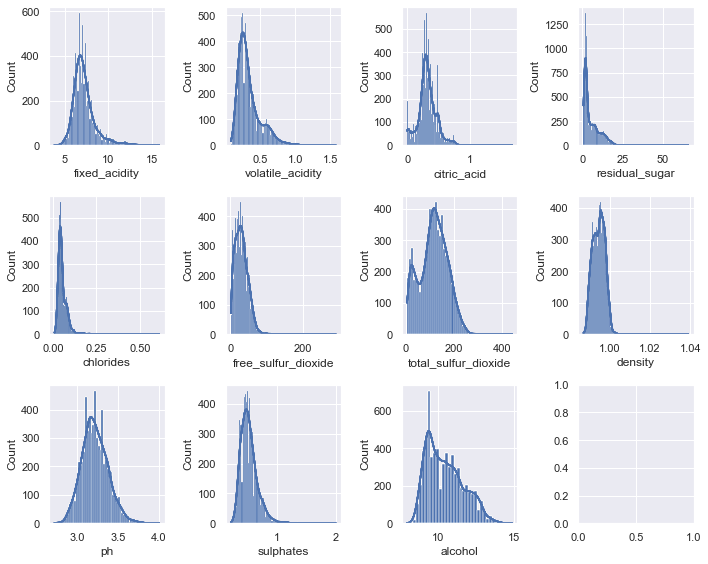

In [91]:
fig, axs = plt.subplots(3, 4, figsize=(10, 8))
sns.set(style="darkgrid")
sns.color_palette("tab10")

for item in cols_features:
    sns.histplot(data=wines, x="fixed_acidity", kde=True, ax=axs[0, 0])
    sns.histplot(data=wines, x="volatile_acidity", kde=True, ax=axs[0, 1])
    sns.histplot(data=wines, x="citric_acid", kde=True, ax=axs[0, 2])
    sns.histplot(data=wines, x="residual_sugar", kde=True, ax=axs[0, 3])
    sns.histplot(data=wines, x="chlorides", kde=True, ax=axs[1, 0])
    sns.histplot(data=wines, x="free_sulfur_dioxide", kde=True, ax=axs[1, 1])
    sns.histplot(data=wines, x="total_sulfur_dioxide", kde=True, ax=axs[1, 2])
    sns.histplot(data=wines, x="density", kde=True, ax=axs[1, 3])
    sns.histplot(data=wines, x="ph", kde=True, ax=axs[2, 0])
    sns.histplot(data=wines, x="sulphates", kde=True, ax=axs[2, 1])
    sns.histplot(data=wines, x="alcohol", kde=True, ax=axs[2, 2])

plt.tight_layout()
plt.show()

# xaxes = cols_features
# yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11']
# titles = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11'] 

# fig, ax = plt.subplots(4,3)
# a = a.ravel()

# for idx,ax in enumerate(a):
#     ax.hist(wines[idx])
#     ax.set_title(titles[idx])
#     ax.set_xlabel(xaxes[idx])
#     ax.set_ylabel(yaxes[idx])


- Think about when do we need label_encoder, ordinal_encoder, and one_hot_encoder.
- How to set the order of categorical variables for ordinal encoder:
    - https://stackoverflow.com/questions/51308994/python-sklearn-determine-the-encoding-order-of-labelencoder
    - https://asktowolrd.com/data-science/difference-between-ordinalencoder-and-labelencoder/
    - https://www.janmeppe.com/notes/machine_learning/preprocessing_structured_data/encode_ordinal_categorical_features/


In [17]:
# Encoding variables

# identify which features need which type of encoder
col_all = list(wines.columns)
col_category = ['wine_type', 'wine_quality']
col_numeric = [x for x in col_all if x not in col_category]
print('categorical featureds:',col_category)
print('numeric features:',col_numeric)

categorical featureds: ['wine_type', 'wine_quality']
numeric features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']


In [18]:
# categorical features 
list_feature_ordinal = ['wine_quality']
list_feature_onehot = ['wine_type']


# ====== Function (START) : Encoding variables 
def encode_features(my_df,list_feature_ordinal,list_feature_onehot):
    # category features
    # ordinal encoder
    category_order = [['low','medium','high']]
    ord_enc = OrdinalEncoder(category_order)
    for item in list_feature_ordinal:
        X = my_df[item].to_numpy().reshape(-1,1)
        my_df[item+'_encoded'] = ord_enc.fit_transform(X)
        my_df_ord = pd.DataFrame(my_df[item+'_encoded'], index=my_df.index)
    print(my_df_ord.head())

    # one hot encoder
    one_hot_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    for item in list_feature_onehot:
        X = my_df[item].to_numpy().reshape(-1,1)
        my_df_hot = one_hot_enc.fit_transform(X)
        my_df_hot_enc = pd.DataFrame(my_df_hot, index=my_df.index)
        my_df_hot_enc.columns = one_hot_enc.get_feature_names().tolist()
    print(my_df_hot_enc.head())
    
    # merge dataframes
    my_df_encoded = pd.concat([my_df, my_df_hot_enc], axis=1)

    return my_df_encoded
# ====== Function (END)

In [19]:
wines_encoded = encode_features(wines, list_feature_ordinal, list_feature_onehot)
wines_encoded.head()

   wine_quality_encoded
0                   2.0
1                   0.0
2                   1.0
3                   1.0
4                   1.0
   x0_red  x0_white
0     0.0       1.0
1     1.0       0.0
2     0.0       1.0
3     0.0       1.0
4     0.0       1.0
C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass categories=[['low', 'medium', 'high']] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type wine_quality  wine_quality_encoded  x0_red  \
0     12.2        8     white         high                   2.0     0.0   
1      9.9        5       red          low                   0.0     1.0   
2     12.0        7     white       medium                   1.0     0.0   
3      9.5        6     white       medium                   1.0     0.0   
4      8.9        6     white       medium                   1.0     0.0   

   x0_white  
0       1.0  
1       0.0  
2       1.0  
3       1.0  
4       1.0

In [20]:
# save final data as csv
path_out = r'./data/wines_features.csv'
wines_encoded.to_csv(path_out) 

# Model training and evaluation

- should we normalize/standardize raw data before spliting train/test dataset?

    : check the distribution of features 
    
    : check the strength/weakness of machine learning algorithms 

- ref: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/



## Prediction1 - classification: wine_type

In [21]:
# Split data (train/test) 
wines_features = wines_encoded.drop(columns=['quality','wine_quality', 'wine_quality_encoded','wine_type','x0_red','x0_white'])
wines_feature_names = wines_features.columns

wines_type_labels = np.array(wines_encoded['wine_type'])
wines_quality_labels = np.array(wines_encoded['wine_quality'])

In [22]:
wines_features

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.17         0.74           12.80      0.045   
1               7.7              0.64         0.21            2.20      0.077   
2               6.8              0.39         0.34            7.40      0.020   
3               6.3              0.28         0.47           11.20      0.040   
4               7.4              0.35         0.20           13.90      0.054   
...             ...               ...          ...             ...        ...   
6492            7.6              0.32         0.58           16.75      0.050   
6493            5.6              0.28         0.27            3.90      0.043   
6494            6.4              0.37         0.20            5.60      0.117   
6495            6.5              0.26         0.50            8.00      0.051   
6496            7.2              0.62         0.06            2.70      0.077   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    24.0                 126.0  0.99420  3.26       0.38   
1                    32.0                 133.0  0.99560  3.27       0.45   
2                    38.0                 133.0  0.99212  3.18       0.44   
3                    61.0                 183.0  0.99592  3.12       0.51   
4                    63.0                 229.0  0.99888  3.11       0.50   
...                   ...                   ...      ...   ...        ...   
6492                 43.0                 163.0  0.99990  3.15       0.54   
6493                 52.0                 158.0  0.99202  3.35       0.44   
6494                 61.0                 183.0  0.99459  3.24       0.43   
6495                 46.0                 197.0  0.99536  3.18       0.47   
6496                 15.0                  85.0  0.99746  3.51       0.54   

      alcohol  
0        12.2  
1         9.9  
2        12.0  
3         9.5  
4         8.9  
...       ...  
6492      9.2  
6493     10.7  
6494      9.5  
6495      9.5  
6496      9.5  

[6497 rows x 11 columns]

In [23]:
# define IV & DV
X = wines_features
y_wine_type = wines_encoded['wine_type']

# split dataset for predicting wine quality
wt_train_x, wt_test_x, wt_train_y, wt_test_y = train_test_split(X, y_wine_type, test_size=0.3, random_state=42)
print(Counter(wt_train_y), Counter(wt_test_y))
print('Features:', list(wines_feature_names))

# standardizae DV(numeric features) using scaler
X = np.array(X)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(wt_train_x)
X_test_scaled = scaler.transform(wt_test_x)

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']


### Modeling - wine_type - comparison algorithms

In [24]:
# ====== Function (START) : evaluate each model in turn


def compare_models(str_model_dv,X, Y):
    # prepare configuration for cross validation test harness
    seed = 10
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
    models.append(('SVM', SVC()))
    models.append(('NB', GaussianNB()))
    models.append(('LDA', LinearDiscriminantAnalysis()))

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    results_acc = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = model_selection.cross_val_score(
                                                    model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        results_acc.append(str(msg))
        
    model_type = str(str_model_dv)
    return model_type, results_acc, names, results
 # ====== Function (END)

In [25]:
# ====== Function (START): boxplot algorithm comparison


def plot_compare_model_acc(x):
    fig = plt.figure(figsize=(10, 6))
    model_type = x[0]
    names = x[2]
    results = x[3]

    fig.suptitle('Algorithm Comparison:'+model_type)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    return plt.show()

    
# ====== Function (END)

In [26]:
# compare algorithms - wine_type
wine_type_prediction = compare_models('wine_type',wt_train_x,wt_train_y)

C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

  Algorithms   Mean Accuracy (std)
0         LR   0.980208 (0.006137)
1       CART   0.983727 (0.005577)
2         RF   0.994064 (0.003413)
3        KNN   0.943044 (0.007615)
4        SVM   0.936884 (0.008382)
5         NB   0.969648 (0.006297)
6        LDA   0.995381 (0.004110)


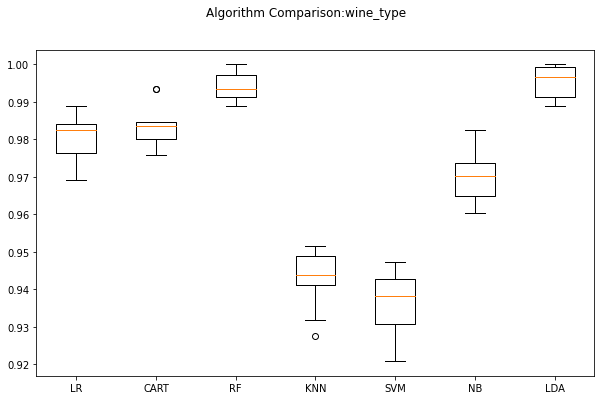

<Figure size 432x288 with 0 Axes>

In [27]:
# plot results
my_res = wine_type_prediction[1]
df = pd.DataFrame([item.split(":") for item in my_res])
df.columns = ['Algorithms','Mean Accuracy (std)']
print(df)

plot_compare_model_acc(wine_type_prediction)

# save plot
plt.savefig("./output/compare_models_wt.png")

## Prediction2 - classification: wine_quality

In [28]:
# define IV & DV
X = wines_features
y_wine_quality = wines_encoded['wine_quality']


# split dataset for predicting wine quality
wq_train_x, wq_test_x, wq_train_y, wq_test_y = train_test_split(X, y_wine_quality, test_size=0.3, random_state=42)
print(Counter(wq_train_y), Counter(wq_test_y))
print('Features:', list(wines_feature_names))

# standardizae DV(numeric features) using scaler
X = np.array(X)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(wq_train_x)
X_test_scaled = scaler.transform(wq_test_x)


Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']


### Modeling - wine_quality - comparison algorithms

In [29]:
# compare algorithms - wine_quality
wine_quality_prediction = compare_models('wine_quality',wq_train_x,wq_train_y)

C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

  Algorithms   Mean Accuracy (std)
0         LR   0.679133 (0.025448)
1       CART   0.727286 (0.017659)
2         RF   0.799870 (0.020627)
3        KNN   0.639759 (0.011058)
4        SVM   0.603258 (0.015513)
5         NB   0.650109 (0.017950)
6        LDA   0.707277 (0.023434)


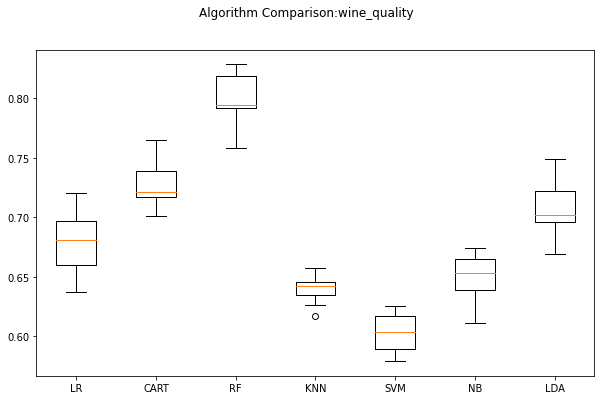

<Figure size 432x288 with 0 Axes>

In [31]:
# plot results
my_res = wine_quality_prediction[1]
df = pd.DataFrame([item.split(":") for item in my_res])
df.columns = ['Algorithms','Mean Accuracy (std)']
print(df)

plot_compare_model_acc(wine_quality_prediction)

# save plot
plt.savefig("./output/compare_models_wq.png")

## Prediction2.1 - classification: wine_quality for red wine using pipeline (LR/DT/RF/KNN)

### pipeline
- ref: https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05
- ref: https://analyticsindiamag.com/hands-on-tutorial-on-machine-learning-pipelines-with-scikit-learn/
- ref: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
- ref: https://iaml.it/blog/optimizing-sklearn-pipelines

In [30]:
# subset data
wine_red = wines_encoded[wines_encoded.wine_type == 'red']
wine_red.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1             7.7             0.640         0.21             2.2      0.077   
5             7.2             0.530         0.14             2.1      0.064   
8             9.0             0.440         0.49             2.4      0.078   
13            8.1             0.725         0.22             2.2      0.072   
14            5.2             0.480         0.04             1.6      0.054   

    free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
1                  32.0                 133.0  0.99560  3.27       0.45   
5                  15.0                  29.0  0.99323  3.35       0.61   
8                  26.0                 121.0  0.99780  3.23       0.58   
13                 11.0                  41.0  0.99670  3.36       0.55   
14                 19.0                 106.0  0.99270  3.54       0.62   

    alcohol  quality wine_type wine_quality  wine_quality_encoded  x0_red  \
1       9.9        5       red          low                   0.0     1.0   
5      12.1        6       red       medium                   1.0     1.0   
8       9.2        5       red          low                   0.0     1.0   
13      9.1        5       red          low                   0.0     1.0   
14     12.2        7       red       medium                   1.0     1.0   

    x0_white  
1        0.0  
5        0.0  
8        0.0  
13       0.0  
14       0.0

In [41]:
# Split data (train/test) 
r_wines_features = wine_red.drop(columns=['quality','wine_quality', 'wine_quality_encoded','wine_type','x0_red','x0_white'])
r_wines_feature_names = r_wines_features.columns

r_wines_type_labels = np.array(wine_red['wine_type'])
r_wines_quality_labels = np.array(wine_red['wine_quality'])

# define IV & DV
X = r_wines_features
r_y_wine_quality = wine_red['wine_quality']

# split dataset for predicting wine quality
r_wq_train_x, r_wq_test_x, r_wq_train_y, r_wq_test_y = train_test_split(X, r_y_wine_quality, test_size=0.3, random_state=42)

In [43]:
# red wine quality prediction - using pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)), 
                     ('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest = Pipeline([('scalar3', StandardScaler()),
                      ('pca3', PCA(n_components=2)),
                      ('rf_classifier', RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('knn_classifier',KNeighborsClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor'}

for pipe in pipelines:
  pipe.fit(r_wq_train_x, r_wq_train_y)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(r_wq_test_x,r_wq_test_y)))

Logistic Regression Test Accuracy:0.6645833333333333
Decision Tree Test Accuracy:0.6375
Support Vector Machine Test Accuracy:0.6875
K Nearest Neighbor Test Accuracy:0.6020833333333333


## Prediction2.2 - classification: wine_quality for white wine using LR/RF/LDA/KNN

In [44]:
# subset data
wine_white = wines_encoded[wines_encoded.wine_type == 'white']
wine_white.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   
6            7.5              0.27         0.31            17.7      0.051   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   
6                 33.0                 173.0  0.99900  3.09       0.64   

   alcohol  quality wine_type wine_quality  wine_quality_encoded  x0_red  \
0     12.2        8     white         high                   2.0     0.0   
2     12.0        7     white       medium                   1.0     0.0   
3      9.5        6     white       medium                   1.0     0.0   
4      8.9        6     white       medium                   1.0     0.0   
6     10.2        5     white          low                   0.0     0.0   

   x0_white  
0       1.0  
2       1.0  
3       1.0  
4       1.0  
6       1.0

In [45]:
# Split data (train/test) 
w_wines_features = wine_white.drop(columns=['quality','wine_quality', 'wine_quality_encoded','wine_type','x0_red','x0_white'])
w_wines_feature_names = w_wines_features.columns

w_wines_type_labels = np.array(wine_white['wine_type'])
w_wines_quality_labels = np.array(wine_white['wine_quality'])

# define IV & DV
X = w_wines_features
w_y_wine_quality = wine_white['wine_quality']

# split dataset for predicting wine quality
w_wq_train_x, w_wq_test_x, w_wq_train_y, w_wq_test_y = train_test_split(X, w_y_wine_quality, test_size=0.3, random_state=42)

In [46]:
# white wine quality prediction - using pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)), 
                     ('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest = Pipeline([('scalar3', StandardScaler()),
                      ('pca3', PCA(n_components=2)),
                      ('rf_classifier', RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('knn_classifier',KNeighborsClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor'}

for pipe in pipelines:
  pipe.fit(w_wq_train_x, w_wq_train_y)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(w_wq_test_x,w_wq_test_y)))

Logistic Regression Test Accuracy:0.6163265306122448
Decision Tree Test Accuracy:0.6482993197278911
Support Vector Machine Test Accuracy:0.6972789115646258
K Nearest Neighbor Test Accuracy:0.6074829931972789


### How can we extract feature importance (feature names and their coefficient values in each model) when we use pipeline?
    - https://towardsdatascience.com/how-to-get-feature-importances-from-any-sklearn-pipeline-167a19f1214

## Feature importance from random forest

No handles with labels found to put in legend.
alcohol                 0.177912
sulphates               0.116282
volatile_acidity        0.107908
total_sulfur_dioxide    0.097518
density                 0.093384
ph                      0.076018
chlorides               0.073510
fixed_acidity           0.073053
citric_acid             0.062839
free_sulfur_dioxide     0.061970
residual_sugar          0.059607
dtype: float64


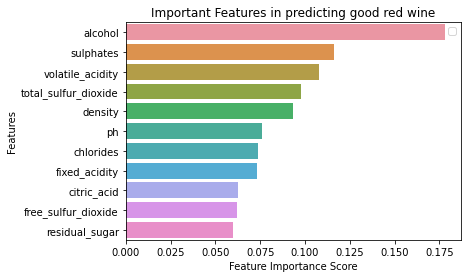

In [50]:
# red wine - random forest - feature importance

# define IV & DV
X =r_wines_features
r_y_wine_quality = wine_red['wine_quality']

# split dataset for predicting wine quality
r_wq_train_x, r_wq_test_x, r_wq_train_y, r_wq_test_y = train_test_split(X, r_y_wine_quality, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(r_wq_train_x, r_wq_train_y)
r_wq_rf_predictions = rf.predict(r_wq_test_x)

r_feature_imp = pd.Series(rf.feature_importances_, index=r_wines_features.columns).sort_values(ascending=False)
print(r_feature_imp)

# Creating a bar plot : feature importance
sns.barplot(x=r_feature_imp, y=r_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features in predicting good red wine")
plt.legend()
plt.show()

#=========== feature importance
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

No handles with labels found to put in legend.
alcohol                 0.134688
volatile_acidity        0.119523
density                 0.106661
free_sulfur_dioxide     0.098555
total_sulfur_dioxide    0.088136
residual_sugar          0.085363
chlorides               0.077977
citric_acid             0.077132
ph                      0.076398
sulphates               0.068023
fixed_acidity           0.067543
dtype: float64


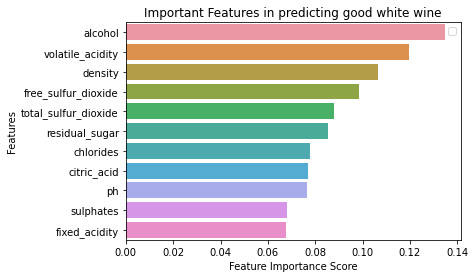

In [52]:
# white wine - random forest - feature importance

# define IV & DV
X = w_wines_features
w_y_wine_quality = wine_white['wine_quality']

# split dataset for predicting wine quality
w_wq_train_x, w_wq_test_x, w_wq_train_y, w_wq_test_y = train_test_split(X, w_y_wine_quality, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(w_wq_train_x, w_wq_train_y)
w_wq_rf_predictions = rf.predict(w_wq_test_x)

w_feature_imp = pd.Series(rf.feature_importances_, index=w_wines_features.columns).sort_values(ascending=False)
print(w_feature_imp)

# Creating a bar plot : feature importance
sns.barplot(x=w_feature_imp, y=w_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features in predicting good white wine")
plt.legend()
plt.show()

#=========== feature importance
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

# ================= DO NOT READ BELOW ================= 

# scattor plot - comparison of predicted price vs. actual price

In [ ]:
# actual price - white wine 

raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wines_sales_prep.csv', sep=",", index_col=[0])
raw_data.drop(raw_data.columns[raw_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_sales = raw_data

df_sales.head(5)

country         designation  points  ...  rating_n price_bin_n wine_type
1  Portugal             Campelo      85  ...         2           2     white
2  Portugal             Miranda      85  ...         2           2     white
3  Portugal              Daphne      91  ...         0           2     white
5  Portugal      Casal da Seara      84  ...         2           2     white
6  Portugal  Torre de Vila Nova      88  ...         0           2     white

[5 rows x 12 columns]

In [ ]:
df_sales['wine_type'].isnull().value_counts()

False    315
Name: wine_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


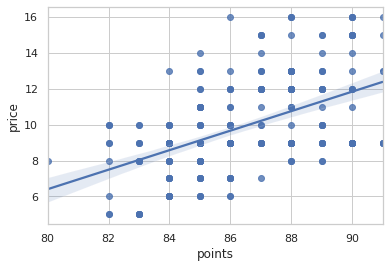

In [ ]:

#create scatterplot with regression line
x = df_sales['points']
y = df_sales['price']
sns.regplot(x, y)

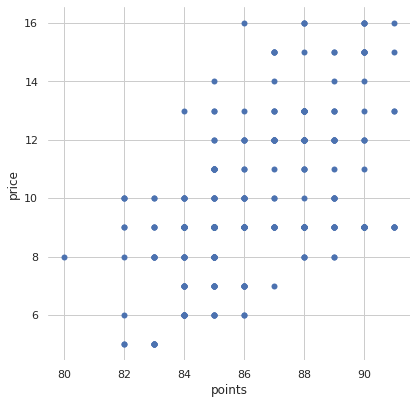

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
price_bin = ["high", "medium", "low"]
sns.scatterplot(x="points", y="price",
                #hue="wine_type", #size="rating_n",
                #palette=SlateGrey, #"ch:r=-.2,d=.3_r",
                hue_order="price_bin",
                linewidth=0,
                data=df_sales, ax=ax)

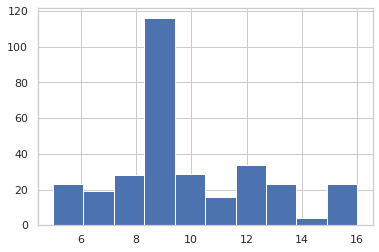

In [ ]:
df_sales['price'].hist()

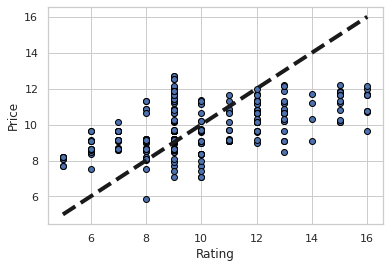

In [ ]:
# coefficient of linear model: from points to price (from cross validated)
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
X = df_sales['points']
y = df_sales['price']
#X, y = datasets.load_diabetes(return_X_y=True)

# standardization
#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)
X_scaled = sc.fit_transform(X.reshape(-1,1))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_scaled, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Rating')
ax.set_ylabel('Price')
plt.show()

## sales data - mean, min, max

In [ ]:
df_sales_white = df_sales[df_sales['wine_type'] == 'white']
df_sales_white

df_sales_w_price_mean = pd.DataFrame(df_sales_white.groupby('price_bin')['price'].mean())
print('price_mean_white')
print(df_sales_w_price_mean)
df_sales_w_price_min = df_sales_white.groupby('price_bin')['price'].min()
df_sales_w_price_max = df_sales_white.groupby('price_bin')['price'].max()
print('min_white')
print(df_sales_w_price_min)
print('max_white')
print(df_sales_w_price_max)

In [ ]:
df_sales_red = df_sales[df_sales['wine_type'] == 'red']
df_sales_red

df_sales_w_price_mean = pd.DataFrame(df_sales_red.groupby('price_bin')['price'].mean())
print('price_mean_red')
print(df_sales_w_price_mean)
df_sales_w_price_min = df_sales_red.groupby('price_bin')['price'].min()
df_sales_w_price_max = df_sales_red.groupby('price_bin')['price'].max()
print('min_red')
print(df_sales_w_price_min)
print('max_red')
print(df_sales_w_price_max)

price_mean_red
           price
price_bin       
low          5.0
medium       9.5
min_red
price_bin
low       5
medium    9
Name: price, dtype: int64
max_red
price_bin
low        5
medium    10
Name: price, dtype: int64


# predicted price

In [ ]:
# coefficient from linear model predicting price from quality 

reg = LinearRegression().fit(X_scaled, y)
print('coef (price>quality):' + str(reg.coef_)) #array([1.27177039])
print('intercept (price>quality):' +str(reg.intercept_))

coef (price>quality):[1.27177039]
intercept (price>quality):9.885714285714288


In [ ]:
# predicted price - white wine - random forest
# predicted price - red wine - random forest

raw_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wines_white.csv', sep=",", index_col=[0])
raw_white.drop(raw_white.columns[raw_white.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_white_price = raw_white
df_white_price.head(5)

df_white_price['price_est'] = df_white_price['wine_quality_N']
df_white_price['price_est']

fixed acidity  volatile acidity  ...  quality_label  wine_quality_N
0            7.0              0.17  ...           high               0
2            6.8              0.39  ...         medium               2
3            6.3              0.28  ...         medium               2
4            7.4              0.35  ...         medium               2
6            7.5              0.27  ...            low               1

[5 rows x 15 columns]

In [ ]:
# if you give us composition of wine, machine  will predict the quality of wine, and we suggest you to rate the wine using this range of price. This criteria is suggested from another dataset. 

# source: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

# Modelling - comparison algorithms for wine_price_tag

In [ ]:
# wpr_train_X, wpr_test_X, wpr_train_y, wpr_test_y

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# load dataset
# set IV and DV
X = df_feature
Y = df_price

# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20)))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn - wine_quality
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# output
# LR: 0.619521 (0.022164)
# KNN: 0.587043 (0.018804)
# RF: 0.814684 (0.011133)
# CART: 0.729568 (0.019463)
# SVM: 0.602586 (0.022230)

In [ ]:
#from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score(labels_of_testing_set, predictions)


# Modelling : predicting price from quality, using RF/LR/KNN/SVM

# sales data exploration

In [ ]:
# load filtered dataset
raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine_sales_data.csv", sep=",", index_col = [0])

# re-shuffle records just to randomize data points
df_sales_all = raw.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_sales_target = df_sales_all[['country', 'description', 'points', 'price', 'variety']]

In [ ]:
df_sales_target.describe() 
#df_sales_all.info #[150930 rows x 11 columns]

In [ ]:
df_sales_target['country'] 

0         Argentina
1           Germany
2                US
3             Chile
4                US
            ...    
150925           US
150926       France
150927           US
150928      Germany
150929       France
Name: country, Length: 150930, dtype: object

In [ ]:
df_sales_target['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [ ]:
sales_country = pd.DataFrame(df_sales_target['country'].value_counts())
sales_country = sales_country.head(14)
sales_country

country
US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Germany          2452
South Africa     2258
Greece            884
Israel            630

In [ ]:
target_country = list(df_sales_target['country'].value_counts().index[0:14])
target_country

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Portugal',
 'Australia',
 'New Zealand',
 'Austria',
 'Germany',
 'South Africa',
 'Greece',
 'Israel']

In [ ]:
pip install squarify

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

In [ ]:
sales_country.country.values

array([62397, 23478, 21098,  8268,  5816,  5631,  5322,  4957,  3320,
        3057,  2452,  2258,   884,   630])

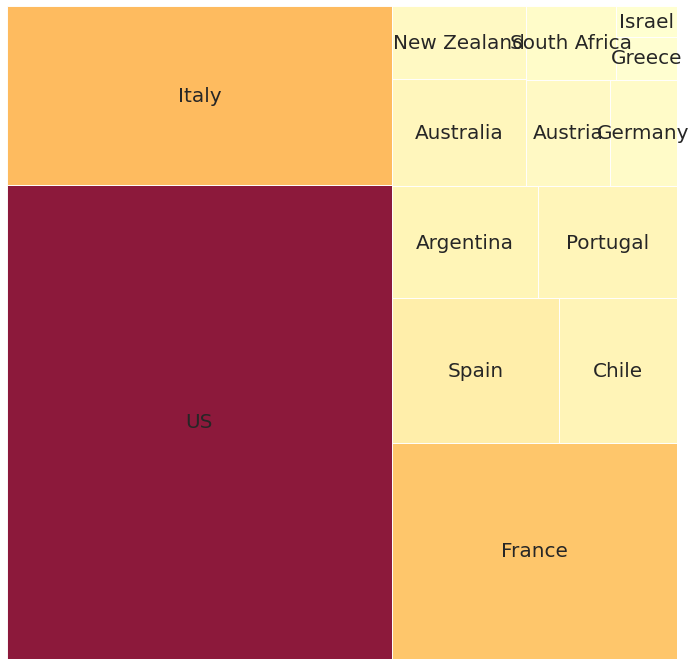

In [ ]:
# If you have a data frame?
import matplotlib
import pandas as pd
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

fig, ax = plt.subplots(1, figsize = (12,12))
norm = matplotlib.colors.Normalize(vmin=min(sales_country.country), vmax=max(sales_country.country))
colors = [matplotlib.cm.YlOrRd(norm(value)) for value in sales_country.country.values]

squarify.plot(sizes=sales_country['country'], label=sales_country['country'].index, color = colors, alpha=.9, text_kwargs={'fontsize':20} )
plt.axis('off')
plt.show()

In [ ]:
df_sales_target.loc[(df_sales_target['country'] == 'US')].value_counts()

country  ...                  variety
2           US  ...                    Syrah
4           US  ...               Pinot Noir
5           US  ...          Sauvignon Blanc
6           US  ...               Pinot Noir
8           US  ...                    Syrah
...        ...  ...                      ...
150912      US  ...                    Syrah
150918      US  ...                    Syrah
150921      US  ...                 Riesling
150925      US  ...               Pinot Noir
150927      US  ...  Rhône-style White Blend

[62397 rows x 5 columns]

In [ ]:
# Creating a bar plot
sns.barplot(x=target_country, y=df_sales_target['price'])
# Add labels to your graph
plt.xlabel('Country')
plt.ylabel('Price')
plt.title("Price of wines in multiple countries")
plt.legend()
plt.show()